In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_json("ai_papers.json")

In [3]:
df.head()

,id,title,category,abstract,version
0,0704.0047,Intelligent location of simultaneously active ...,cs.NE cs.AI,The intelligent acoustic emission locator is...,"Sun, 1 Apr 2007 13:06:50 GMT"
1,0704.0050,Intelligent location of simultaneously active ...,cs.NE cs.AI,Part I describes an intelligent acoustic emi...,"Sun, 1 Apr 2007 18:53:13 GMT"
2,0704.0304,The World as Evolving Information,cs.IT cs.AI math.IT q-bio.PE,This paper discusses the benefits of describ...,"Wed, 13 Oct 2010 19:49:16 GMT"
3,0704.0671,Learning from compressed observations,cs.IT cs.LG math.IT,The problem of statistical learning is to co...,"Thu, 5 Apr 2007 02:57:15 GMT"
4,0704.0954,Sensor Networks with Random Links: Topology De...,cs.IT cs.LG math.IT,"In a sensor network, in practice, the commun...","Fri, 6 Apr 2007 21:58:52 GMT"


In [4]:
df['category'] = df['category'].apply(lambda x: str(x).split(" "))

In [5]:
df["category"][0]

['cs.NE', 'cs.AI']

<AxesSubplot:title={'center':'Word Count Distribution for article descriptions'}, ylabel='Frequency'>

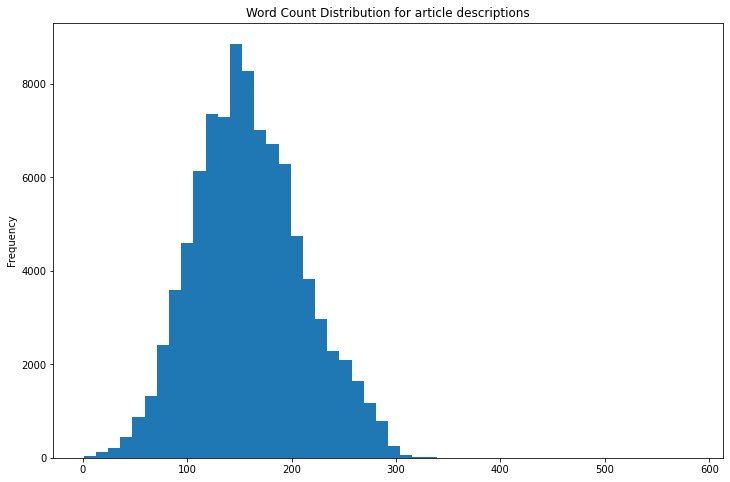

In [6]:
df['word_count'] = df['abstract'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for article descriptions')

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

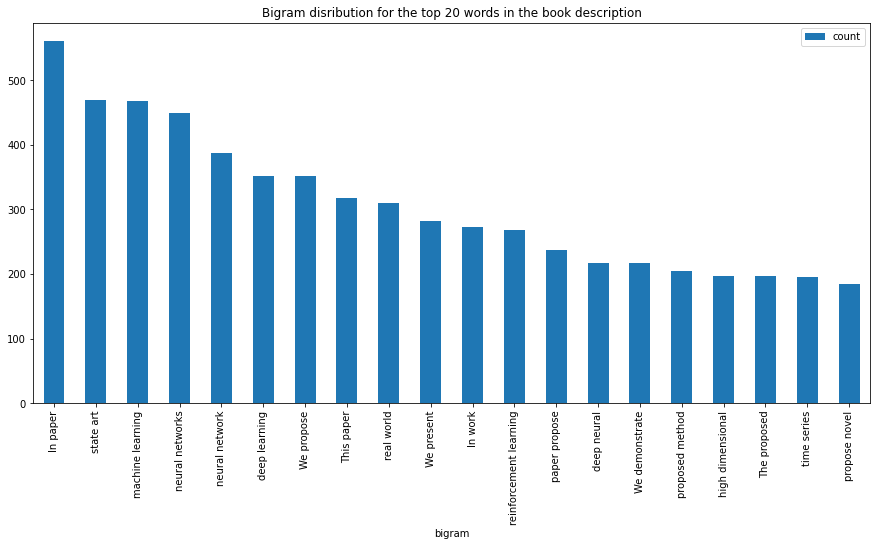

In [7]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['abstract'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

<AxesSubplot:title={'center':'Bigram disribution for the top 2b0 words in the book description'}, xlabel='trigram'>

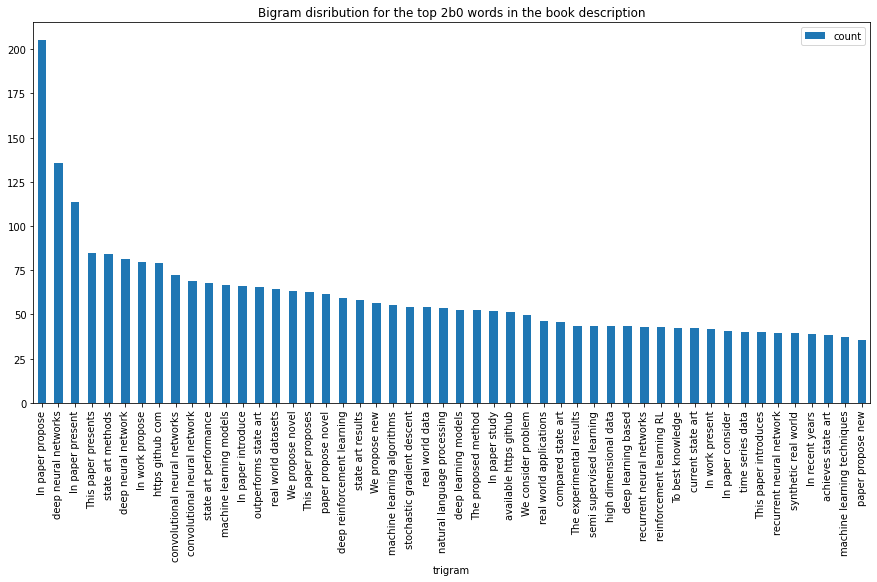

In [20]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['abstract'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(50)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 2b0 words in the book description", figsize = (15,7), )

In [9]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_abs'] = df['abstract'].apply(_removeNonAscii)
df['cleaned_abs'] = df.cleaned_abs.apply(func = make_lower_case)
df['cleaned_abs'] = df.cleaned_abs.apply(func = remove_stop_words)
df['cleaned_abs'] = df.cleaned_abs.apply(func=remove_punctuation)
df['cleaned_abs'] = df.cleaned_abs.apply(func=remove_html)

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

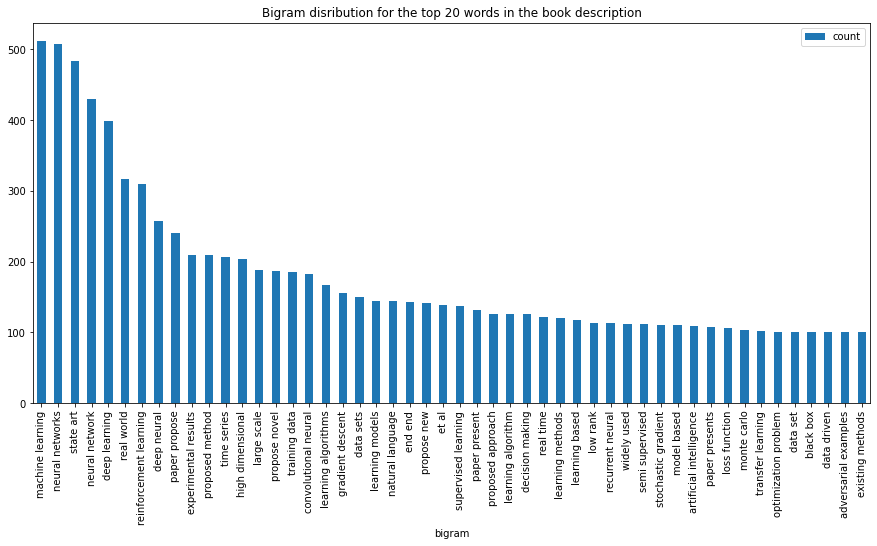

In [21]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['cleaned_abs'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [22]:
trigram

,trigram,count
0,In paper propose,204.995710
1,deep neural networks,135.700998
2,In paper present,113.352264
3,This paper presents,84.598321
4,state art methods,83.934785
5,deep neural network,81.194363
6,In work propose,79.671875
7,https github com,79.047372
8,convolutional neural networks,72.509410
9,convolutional neural network,69.044483


In [24]:
ngrams = pd.concat([bigram['bigram'], trigram['trigram']], axis = 1)

In [23]:
bigram

,bigram,count
0,machine learning,511.843768
1,neural networks,507.536349
2,state art,482.702413
3,neural network,430.128583
4,deep learning,398.509797
5,real world,316.885879
6,reinforcement learning,309.714310
7,deep neural,256.899113
8,paper propose,240.621023
9,experimental results,209.805573


In [18]:
ngrams

,bigram,trigram
0,machine learning,In paper propose
1,neural networks,deep neural networks
2,state art,In paper present
3,neural network,This paper presents
4,deep learning,state art methods
5,real world,deep neural network
6,reinforcement learning,In work propose
7,deep neural,https github com
8,paper propose,convolutional neural networks
9,experimental results,convolutional neural network


In [25]:
ngrams.to_csv('ngrams.csv')

In [26]:
ai = pd.read_json('ai_papers.json')
ai.to_csv('ai_papers.csv')

In [40]:
len(ai['abstract'].values)

91496

In [6]:
import numpy as np
import seaborn as sns
cos_values = np.array([0.4851565 ,0.73850901 ,0.49480933 ,0.49480933, 0.4395258,  0.73850901,
 0.41917692 ,0.33399635 ,0.65852824 ,0.65852824 ,0.4603667,  0.71931395,
 0.4561563  ,0.39211496 ,0.47813276 ,0.40181252 ,0.4851565 , 0.41769158,
 0.7134338  ,0.43422845 ,0.44453432 ,0.67290229 ,0.59845395 ,0.57706633,
 0.48754901 ,0.71676797 ,0.56536269 ,0.46193149 ,0.31069063 ,0.46350538,
 0.47220737 ,0.39428103 ,0.38849331 ,0.65035725 ,0.57796343 ,0.65050746,
 0.6358817  ,0.7030936  ,0.4857087  ,0.41567521 ,0.41749526 ,0.44279412,
 0.70582753 ,0.4561563  ,0.6358817  ,0.49567117 ,0.28428391 ,0.42350195,
 0.61656926 ,0.42260209 ,0.71804081 ,0.74353561 ,0.46401828 ,0.74353561,
 0.75435961 ,0.56417233 ,0.7030936  ,0.58799484 ,0.4851565  ,0.38849331,
 0.56536269 ,0.75003349 ,0.55312326 ,0.44232892 ,0.40181252 ,0.68039749,
 0.49848962 ,0.6358649  ,0.58744423 ,0.69041521 ,0.7329008  ,0.54552343,
 0.60540682 ,0.44453432 ,0.         ,0.65532688 ,0.49480933 ,0.54691952,
 0.66777597 ,0.62122327 ,0.55301288 ,0.63271266 ,0.63658506 ,0.61220062,
 0.46727062 ,0.40523593 ,0.57037549 ,0.59492709 ,0.68552236 ,0.58767693,
 0.49480933 ,0.70186354 ,0.46228884 ,0.71483028 ,0.56089665 ,0.69041521,
 0.54123007 ,0.57231128 ,0.67641969 ,0.47467175])


/home/gsandu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

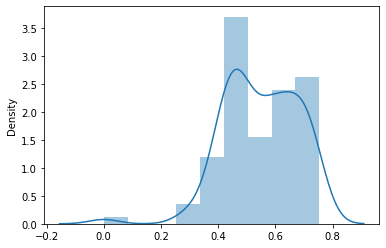

In [7]:
sns.distplot(cos_values)

/home/gsandu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

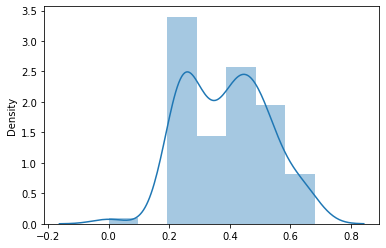

In [10]:


tfidf_scores = np.array([0.20623424 ,0.50661165 ,0.23268296 ,0.23268296 ,0.28495939 ,0.50661165,
 0.23547003 ,0.28331732 ,0.4695009  ,0.4695009  ,0.30476945 ,0.43054024,
 0.19519687 ,0.24845185 ,0.35744696 ,0.23845203 ,0.20623424 ,0.22291943,
 0.54302908 ,0.28533093 ,0.2578702  ,0.40217044 ,0.55277289 ,0.41355741,
 0.4320657  ,0.45324498 ,0.34079388 ,0.25206054 ,0.2448397  ,0.29000264,
 0.34231106 ,0.25824319 ,0.24881672 ,0.62789612 ,0.43361327 ,0.42895972,
 0.49088622 ,0.5183003  ,0.36477394 ,0.26151833 ,0.25109416 ,0.23876019,
 0.65944283 ,0.19519687 ,0.49088622 ,0.41565004 ,0.24640251 ,0.27772303,
 0.38517542 ,0.24035336 ,0.44556746 ,0.50126684 ,0.30783763 ,0.50126684,
 0.47689473 ,0.41781411 ,0.5183003  ,0.42436822 ,0.20623424 ,0.24881672,
 0.34079388 ,0.67968422 ,0.43641885 ,0.3531998  ,0.23845203 ,0.43473254,
 0.42005281 ,0.3993173  ,0.55930275 ,0.44753099 ,0.39753853 ,0.46928358,
 0.54899093 ,0.2578702  ,0.         ,0.51615968 ,0.23268296 ,0.29709121,
 0.39870526 ,0.51469874 ,0.34868108 ,0.35809292 ,0.32409653 ,0.58185316,
 0.45743198 ,0.21532487 ,0.61761216 ,0.54023392 ,0.37043445 ,0.547138,
 0.23268296 ,0.60723606 ,0.48819792 ,0.66740468 ,0.43218135 ,0.44753099,
 0.61058388 ,0.49455808 ,0.64031169 ,0.28877238])
sns.distplot(tfidf_scores)

In [12]:
scibert = np.array(
[0.66212554 ,0.70633888 ,0.67018766 ,0.68567991 ,0.67017069 ,0.72511468,
 0.67046452 ,0.6062006  ,0.69605093 ,0.71000834 ,0.65221653 ,0.70127501,
 0.64850817 ,0.64898348 ,0.66534758 ,0.68450704 ,0.62759409 ,0.67466631,
 0.72414598 ,0.67551785 ,0.69029202 ,0.69773917 ,0.68415203 ,0.67929182,
 0.68022671 ,0.72708139 ,0.73564143 ,0.65904078 ,0.61056409 ,0.68162994,
 0.67436223 ,0.65841856 ,0.70793061 ,0.70185242 ,0.65946541 ,0.70535784,
 0.71110549 ,0.69611187 ,0.57705112 ,0.64197478 ,0.68394051 ,0.65526371,
 0.67631416 ,0.67182803 ,0.72009845 ,0.65990906 ,0.66542292 ,0.65460901,
 0.69512329 ,0.67685041 ,0.66431732 ,0.67862091 ,0.65768394 ,0.69816298,
 0.70210257 ,0.65319948 ,0.69829021 ,0.65943704 ,0.62760153 ,0.64535666,
 0.68087859 ,0.64675179 ,0.62963533 ,0.66944714 ,0.65203576 ,0.67090397,
 0.6582737  ,0.69790816 ,0.67385821 ,0.62193365 ,0.70178361 ,0.61336699,
 0.57100086 ,0.64053097 ,0.52148895 ,0.69096975 ,0.61251044 ,0.68883471,
 0.69482841 ,0.67969112 ,0.65871201 ,0.64475555 ,0.67252975 ,0.61460881,
 0.66245165 ,0.54872551 ,0.66847439 ,0.67773552 ,0.66260209 ,0.64656134,
 0.65426965 ,0.65631018 ,0.67272477 ,0.68647351 ,0.70708113 ,0.62371044,
 0.71309118 ,0.66479626 ,0.68647823 ,0.65038896])


/home/gsandu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

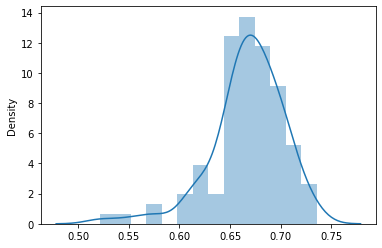

In [13]:
sns.distplot(scibert)